# Welcome to Week 02 Handson - Data Preprocessing #01
In this hands-on session, we will learn some basic data pre-processings, which include:
1. duplicated data handling,
2. missing value handling,
3. data transformation (scalling and converting 'categorical data' to 'numerical data'),
4. outliers removal (for data preprocessing).

## Read dataset "raw-flight-data.csv"

In [2]:
import pandas as pd
# start: py -m notebook

# read csv file into 'df' dataframe
df = pd.read_csv('./raw-flight-data.csv', sep = ",")

# print some data rows
df.head()

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3.0,1.0
1,19,5,DL,14869,12478,0.0,-8.0
2,19,5,DL,14057,14869,-4.0,-15.0
3,19,5,DL,15016,11433,28.0,24.0
4,19,5,DL,11193,12892,-6.0,-11.0


## Milestone 01 (M01)
The given dataset is still a 'raw dataset' with duplicated data and missing values,<br>
1. In M01, please delete the duplicated data (keep only one) and return a dataframe with no duplicated data. **Hint:** use pandas API to handle the duplicated data,<br>
2. Print how many duplicated data (that are removed). **Hint:** calculate the difference of row numbers, before and after duplicate removal.

In [3]:
# write you own code for M01 here
old_row_num = len(df)
m1_df = df.drop_duplicates(keep="first", inplace=False)
new_row_num = len(m1_df)

print('Duplicate Rows Removal')
print("Before: ", old_row_num)
print("After: ", new_row_num)
print("Diff: ", old_row_num-new_row_num)

Duplicate Rows Removal
Before:  2719418
After:  2696983
Diff:  22435


## M02
In M02, we will handle data rows having missing values. **Note:** in the given dataset, the missing values are only in the columns of ```DepDelay``` and ```ArrDelay```.
1. First and naive approach is by deleting the data rows having missing value. From data in M01, use pandas API to remove data rows with 'missing value', with specifications: (i) column subset to be checked = ```DepDelay``` and ```ArrDelay```, (ii) delete the data rows with **at least one missing value** in the given subset in (i),
2. Print the number missing rows from (1),
3. Another approach to handle missing values is by filling those missing values by their corresponding mean values, most frequent values, interpolated values, etc. In this M02, fill the missing values in the columns of ```DepDelay``` and ```ArrDelay``` by their corresponding mean values.
4. Perform 'drop missing value', similar to (1), to the result of (3). Calculate the difference of row numbers before and after. You should get '0' for this. 
5. In your opinion, what are the differences between those two techniques (delete missing values vs filling with mean values)? Which one do you prefer? Please explain your argument.

In [4]:
# write you own code for M02 here
m2_df_1 = m1_df.dropna(axis=0, # delete row 
            how='any', # if one of them is missing, drop
            subset=['DepDelay', 'ArrDelay'], #columns to be deleted
            inplace= False)
print('Missing row numbers:', len(m1_df) - len(m2_df_1))

Missing row numbers: 23798


In [5]:
# m2_df_3[['DepDelay', 'ArrDelay']] = m1_df[['DepDelay', 'ArrDelay']].fillna(value=df.mean())
m2_df_3 = m1_df.fillna(value=df.mean(numeric_only=True))
m2_df_4 = m2_df_3.dropna(axis=0, # delete row 
            how='any', # if one of them is missing, drop
            subset=['DepDelay', 'ArrDelay'], #columns to be deleted
            inplace= False)
print("4. Difference: ", len(m2_df_3) - len(m2_df_4))

4. Difference:  0


Before deciding whether to remove or replace/impute the missing data we have to understand the reason why data goes missing:
If MAR(missing at random) or MCAR(missing completely at random) then dropping is generally considered safe depending upon their occurrences. On the other hand if MNAR(missing not at random) then removing observations with missing values can produce a bias in the model.

Other than that:

Replacing/imputation is more appropriate if the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.
Removing data is more appropriate when dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis.

For this case:

Because the missing value percentage is only 0.88% (23798 rows), it's safe to replace/impute them.

## M03
There is a 'Carrier' column in the given dataset, which is a "categorical variable". 
1. To build a learning model, what we need is numerical data so that our data can be processed by the learning model. Please convert the "categorical valriable" in the column of "Carrier" to "numerical variable". E.g., given categorical variable values of [A, B, A, C], we expect to get [0, 1, 0, 2] or [1, 2, 1, 3]. Thus, a row with the column value of "A", its value should be replaced with "0" (if you use this --> [0, 1, 0, 2]) or "1" (if you use this --> [1, 2, 1, 3]).

In [6]:
# write you own code for M03 here
numerical_carrier = pd.factorize(m2_df_4['Carrier'])[0] # only take the labels, [1] is the unique columns value
print(numerical_carrier)
# pd.factorize(['A','B','A','C'])[0]

[0 0 0 ... 0 0 0]


## M04
In some learning methods, we may perform data transformations so that we can expect a better performance (accuracy). One of the popular data transformation is **scalling**. Please do scalling the data column of "DepDelay" to [-1, 1]. <br>
**Hint:** In this hands-on session, don't use libary to do scalling, we expect you use scalling formula of:<br><br>
$$ \widehat{X} = \frac{(X-X_{min}) \times (BA - BB)}{X_{max}-X_{min}} + BB,$$ <br>
Where:<br>
$
\begin{align}
    \widehat{X} &= \text{scalled value}\\
    X &= \text{value being scalled}\\
    X_{max}, X_{min} &= \text{max of } X \text{, min of }X\\
    BA &= \text{batas atas, untuk kasus kita adalah 1}\\
    BB &= \text{batas bawah, untuk kasus kita adalah -1}\\
\end{align}
$

In [7]:
# write you own code for M04 here
def scaling(X, Xmax, Xmin, BA, BB):
    return ((X-Xmin) * (BA-BB) / (Xmax-Xmin) + BB)

Xmax = m2_df_4['DepDelay'].max()
Xmin = m2_df_4['DepDelay'].min()

m2_df_4['DepDelay'] = scaling(m2_df_4['DepDelay'], Xmax, Xmin, 1, -1)

df[['DepDelay']]

,DepDelay
0,-3.0
1,0.0
2,-4.0
3,28.0
4,-6.0
...,...
2719413,1.0
2719414,-2.0
2719415,18.0
2719416,10.0


## M05
In raw data, there may be outliers and they should be removed before we use our data to our learning model. There are several approaches and one of them is by using Interquartile Range (IQR). The IQR can be used to identify outliers by defining limits on the sample values that are: (i) a factor $k$ of the IQR **below** the 25th percentile (Q1), **or** (ii) a factor $k$ of the IQR **above** the 75th percentile (Q3). The common value for the factor $k$ is the value 1.5 (thus, the outliers condition is below $(Q1 - 1.5 * IQR)$ or above $(Q3 + 1.5 * IQR)$). A factor $k$ of 3 or more can be used to identify values that are extreme outliers (far outs).

In M05, use the column ```ArrDelay``` to filter out the outliers data with $k=1.5$ and one more $k$ value you think it's a good value to filter out the outliers. Please also: (i) print the value of $Q1, Q3, IQR, (Q1 - k * IQR), (Q3 + k * IQR)$ and (ii) count how many outliers you successfully remove by using $k=1.5$ and the other $k$ you choose.

In [19]:
# Outlier removal with ICR:
def DetectOutliers(df, k):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    outlier_floor = Q1 - k * IQR
    outlier_ceil = Q3 + k * IQR
    print("k:", k)
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("(𝑄1−𝑘∗𝐼𝑄𝑅):", outlier_floor)
    print("(𝑄3+𝑘∗𝐼𝑄𝑅):", outlier_ceil)
    return ((df < outlier_floor) | (df > outlier_ceil)).sum()

print("Outliers removed:", DetectOutliers(m2_df_4['ArrDelay'], 1.5))


k: 1.5
Q1: -11.0
Q3: 10.0
IQR: 21.0
(𝑄1−𝑘∗𝐼𝑄𝑅): -42.5
(𝑄3+𝑘∗𝐼𝑄𝑅): 41.5
Outliers removed: 254931


k: 12
Q1: -11.0
Q3: 10.0
IQR: 21.0
(𝑄1−𝑘∗𝐼𝑄𝑅): -263.0
(𝑄3+𝑘∗𝐼𝑄𝑅): 262.0
Outliers removed: 6922


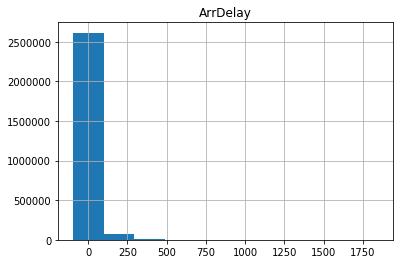

In [24]:
m2_df_4.hist(column='ArrDelay')
print("Outliers removed:", DetectOutliers(m2_df_4['ArrDelay'], 12))

### k=12 reason
After plotting the data distribution of ArrDelay, I felt that k=1.5 will result in a range that is too tight and would then remove a considerable number of data that should be valid in terms of variation. I figured that up until the data value of <= 260 should still be accepted. Therefore, k=12 is the perfect fit for this as it brings the (𝑄3+𝑘∗𝐼𝑄𝑅) limit into 262, thus accepting data values below that.

# Submission 
Submit this ipynb file to course portal similar to what you have done in the Week 01 Handson.